## Import Libaries

In [2]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/39/4a/2684863905b72fceea24edaa10e3e16bc742a184042f463f3b09883d75b0/wordcloud-1.9.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 2.9 MB/s eta 0:00:00a 0:00:01


In [4]:
# utilities
import re
import numpy as np
import pandas as pd
# from google.colab import drive

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Data

In [ ]:
#Importing dataset using a pandas method called read_csv
# df = pd.read_csv('/content/drive/My Drive/MyDataSets/IMDB_Dataset.csv')
df = pd.read_csv('./IMDB_Dataset.csv')



# Exploratory Data Analysis (EDA)

In [ ]:
#return the first 5 rows in the dataframe
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Number of **Colums**

In [ ]:
#return all the columns in the dataframe
df.columns

Index(['review', 'sentiment'], dtype='object')

## Length of the Data

In [ ]:
#print length of data
print('length of data is', len(df))

length of data is 50000


## Shape of the Data

In [ ]:
#print shape of data

df.shape

(50000, 2)

## Information on Columns

In [ ]:
#print data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## Data Types

In [ ]:
#print datat types
df.dtypes

review       object
sentiment    object
dtype: object

## Sum of Null Values

In [ ]:
#to get the sum of all null values
np.sum(df.isnull().any(axis=1))

0

## Number of rows and columns

In [ ]:
#to print out the number of rows and columns
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   2
Count of rows in the data is:   50000


## Unique Values

In [ ]:
#to check the unique sentiment values in the datafrme
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

## Distribution of Negative and Positive Senitments

it is perfectly balanced

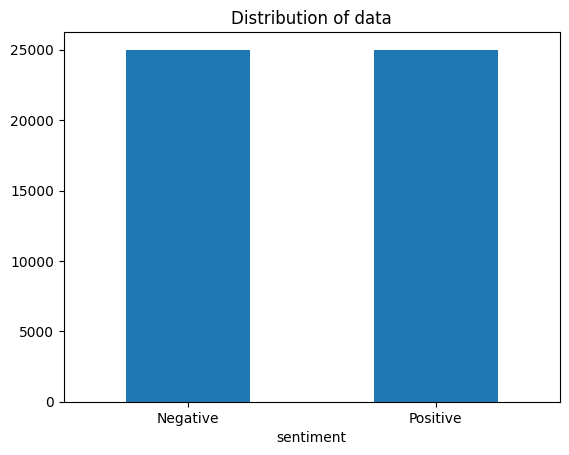

In [ ]:
# Plotting the distribution for dataset.
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['review']), list(df['sentiment'])

<Axes: xlabel='sentiment', ylabel='count'>

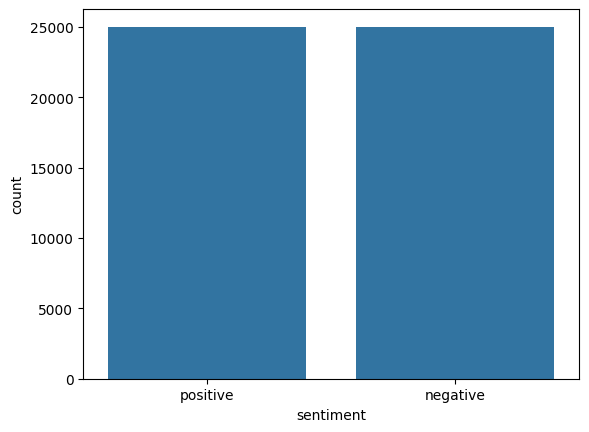

In [ ]:
import seaborn as sns
sns.countplot(x='sentiment', data=df)

# Data Preprocessing

## Replace values so the machine will understand it better

In [ ]:
# replace the postive and negative to 1 and 0
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


## Confirm values

In [ ]:
# check all unique values
df['sentiment'].unique()

array([1, 0])

## Convert Values to Lower case

In [ ]:
#to convert values to lower case
df['review'] = df['review'].str.lower()
#print last 5 values
df['review'].tail()

49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, dtype: object

## Initialize stop word list

In [ ]:
#initialize a list of stop words in english
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

## Remove stopwords

In [ ]:
# Define a set of stopwords from a predefined list
STOPWORDS = set(stopwordlist)

# Define a function to remove stopwords from a given text
def cleaning_stopwords(text):
    # Split the text into words, filter out stopwords, and join the remaining words back into a string
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

# Apply the cleaning_stopwords function to each element in the 'review' column of the DataFrame
df['review'] = df['review'].apply(lambda text: cleaning_stopwords(text))

# Display the first few entries of the 'review' column after stopwords have been removed
df['review'].head()

0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production. <br /><br />the f...
2    thought wonderful way spend time hot summer we...
3    basically there's family little boy (jake) thi...
4    petter mattei's "love time money" visually stu...
Name: review, dtype: object

## Remove HTML tags from review

In [ ]:
from bs4 import BeautifulSoup
# Assuming df is your DataFrame and 'reviews' is the column containing the reviews
df['review'] = df['review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())
df

<ipython-input-51-f6f42ac5f829>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['review'] = df['review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())


,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production. the filming techn...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there's family little boy (jake) thi...,0
4,"petter mattei's ""love time money"" visually stu...",1
...,...,...
49995,thought movie right good job. wasn't creative ...,1
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0
49997,catholic taught parochial elementary schools n...,0
49998,i'm going disagree previous comment side malti...,0


## Remove Punctuations

In [ ]:
# Import the 'string' module to access punctuation characters
import string

# Store the English punctuation characters in a variable
english_punctuations = string.punctuation

# Create a list to store the punctuation characters
punctuations_list = english_punctuations

# Define a function to remove punctuation characters from a given text
def cleaning_punctuations(text):
    # Create a translation table to remove punctuation characters from the text
    translator = str.maketrans('', '', punctuations_list)
    # Use the translation table to remove punctuation characters from the text
    return text.translate(translator)

# Apply the cleaning_punctuations function to each element in the 'review' column of the DataFrame
df['review']= df['review'].apply(lambda x: cleaning_punctuations(x))

# Display the last few entries of the 'review' column after removing punctuation characters
df['review'].tail()


49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    no one expects star trek movies high art but f...
Name: review, dtype: object

## Remove repeating characters

In [ ]:
# Define a function to remove repeating characters from a given text
def cleaning_repeating_char(text):
    # Use regular expression to substitute repeating characters with a single occurrence
    return re.sub(r'(.)\1+', r'\1', text)

# Apply the cleaning_repeating_char function to each element in the 'review' column of the DataFrame
df['review'] = df['review'].apply(lambda x: cleaning_repeating_char(x))

# Display the last few entries of the 'review' column after removing repeating characters
df['review'].tail()

49995    thought movie right god job wasnt creative ori...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schols nu...
49998    im going disagre previous coment side maltin o...
49999    no one expects star trek movies high art but f...
Name: review, dtype: object

## Remove URLs

In [ ]:
# Define a function to remove URLs from a given text
def cleaning_URLs(data):
    # Use regular expression to substitute URLs with a space
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ', data)

# Apply the cleaning_URLs function to each element in the 'review' column of the DataFrame
df['review'] = df['review'].apply(lambda x: cleaning_URLs(x))

# Display the last few entries of the 'review' column after removing URLs
df['review'].tail()

49995    thought movie right god job wasnt creative ori...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schols nu...
49998    im going disagre previous coment side maltin o...
49999    no one expects star trek movies high art but f...
Name: review, dtype: object

## remove all Numeric digits

In [ ]:
# Define a function to remove numbers from a given text
def cleaning_numbers(data):
    # Use regular expression to substitute numbers with an empty string
    return re.sub('[0-9]+', '', data)

# Apply the cleaning_numbers function to each element in the 'review' column of the DataFrame
df['review'] = df['review'].apply(lambda x: cleaning_numbers(x))

# Display the last few entries of the 'review' column after removing numbers
df['review'].tail()


49995    thought movie right god job wasnt creative ori...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schols nu...
49998    im going disagre previous coment side maltin o...
49999    no one expects star trek movies high art but f...
Name: review, dtype: object

In [ ]:

import nltk
from nltk.tokenize import word_tokenize

# Download the required nltk resources (if not already downloaded)
nltk.download('punkt')

# Tokenize the text in the 'review' column
df['review'] = df['review'].apply(lambda x: word_tokenize(x))
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,sentiment
0,"[one, reviewers, mentioned, watching, oz, epis...",1
1,"[wonderful, litle, production, the, filming, t...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basicaly, theres, family, litle, boy, jake, t...",0
4,"[peter, mateis, love, time, money, visualy, st...",1
...,...,...
49995,"[thought, movie, right, god, job, wasnt, creat...",1
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",0
49997,"[catholic, taught, parochial, elementary, scho...",0
49998,"[im, going, disagre, previous, coment, side, m...",0


In [ ]:
# Initialize a PorterStemmer object
st = nltk.PorterStemmer()

# Define a function to perform stemming on a list of words in text data
def stemming_on_text(data):
    # Apply stemming to each word in the input data using the PorterStemmer
    text = [st.stem(word) for word in data]
    # Return the stemmed text
    return data

# Apply the stemming_on_text function to each element in the 'review' column of the DataFrame
df['review']= df['review'].apply(lambda x: stemming_on_text(x))

# Display the first few entries of the 'review' column after stemming
df['review'].head()

0    [one, reviewers, mentioned, watching, oz, epis...
1    [wonderful, litle, production, the, filming, t...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basicaly, theres, family, litle, boy, jake, t...
4    [peter, mateis, love, time, money, visualy, st...
Name: review, dtype: object

## Negative Reviewa WordCloud

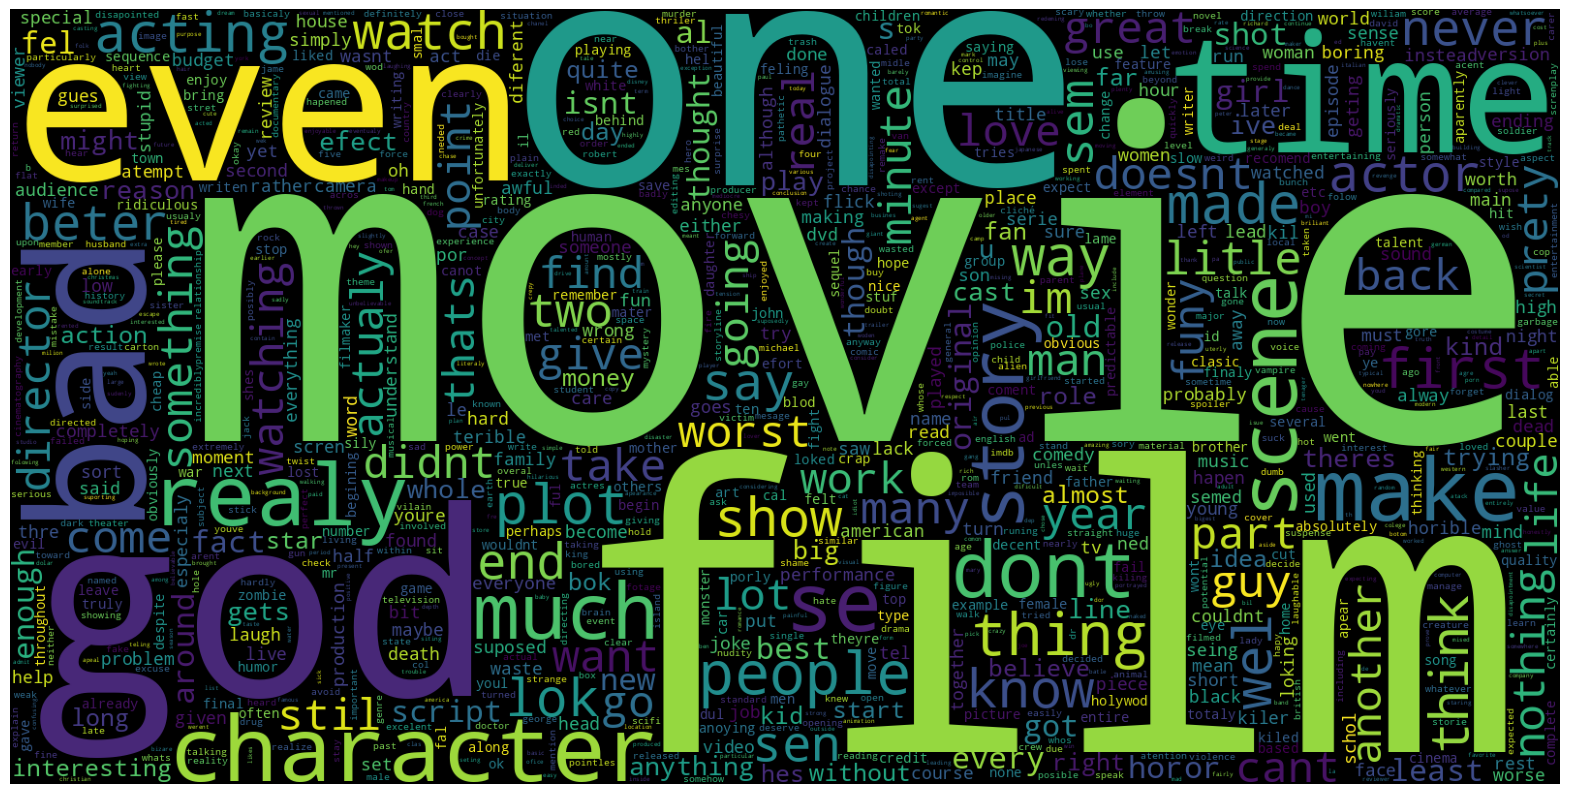

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert lists of tokens into strings
negative_reviews_str = df[df['sentiment'] == 0]['review'].apply(lambda x: ' '.join(x))

# Generate WordCloud
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(' '.join(negative_reviews_str))

# Plot WordCloud
plt.figure(figsize=(20, 20))
plt.imshow(wc)
plt.axis('off')
plt.show()


## Postive Reviews WordCloud

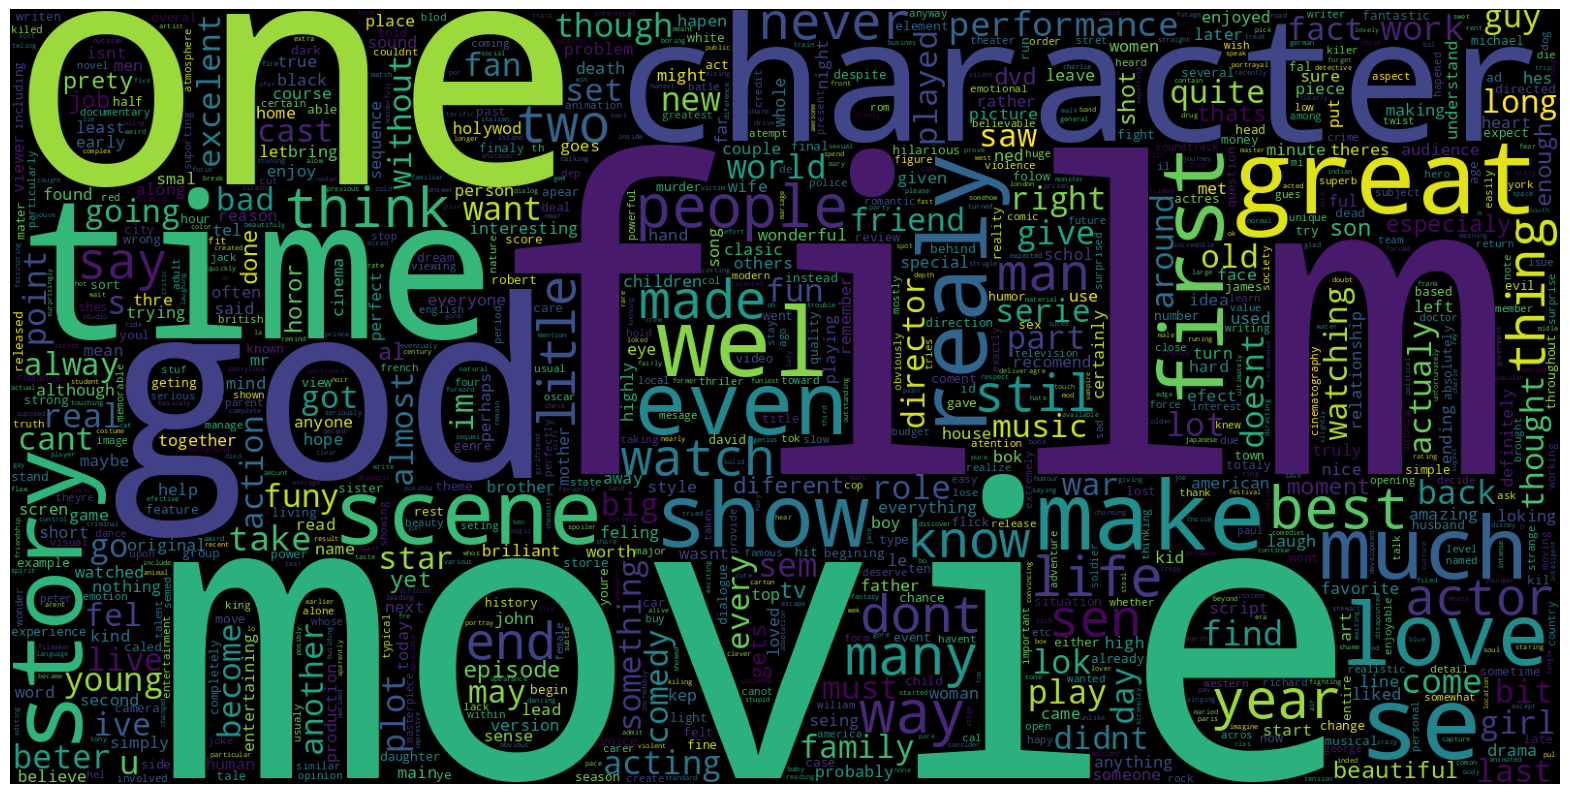

In [ ]:
# Convert lists of tokens into strings
positive_reviews_str = df[df['sentiment'] == 1]['review'].apply(lambda x: ' '.join(x))

# Generate WordCloud
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(' '.join(positive_reviews_str))

# Plot WordCloud
plt.figure(figsize=(20, 20))
plt.imshow(wc)
plt.axis('off')
plt.show()

# Model Training and Evaluation

## Set Independent and Dependent Variables

In [ ]:
X=df.review.apply(lambda x: ' '.join(x))
y=df.sentiment


## Spit Dataset into Test and Train

In [ ]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

## Vectorise the training set

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))


No. of feature_words:  500000


## Transform test and train

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

## Create function for model evaluation

In [ ]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


## Bernoulli Model

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1256
           1       0.89      0.89      0.89      1244

    accuracy                           0.89      2500
   macro avg       0.89      0.89      0.89      2500
weighted avg       0.89      0.89      0.89      2500



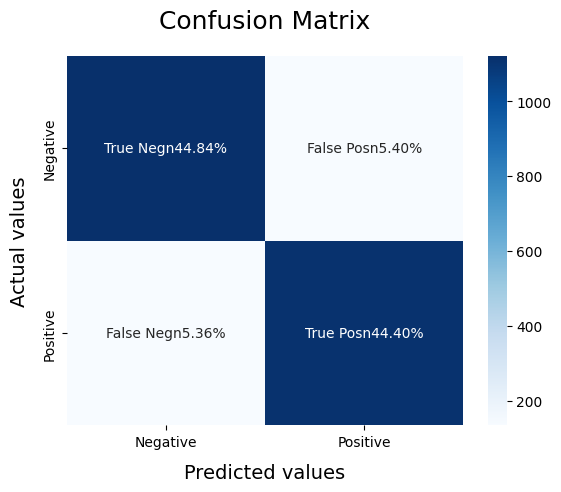

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)


### ROC curve

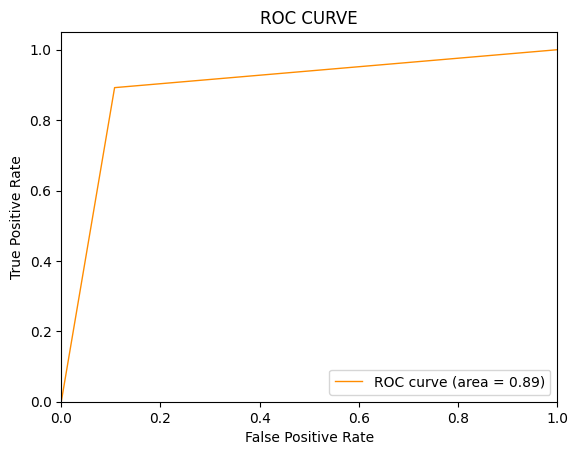

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## Support Vector Classifier Model

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1256
           1       0.90      0.92      0.91      1244

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



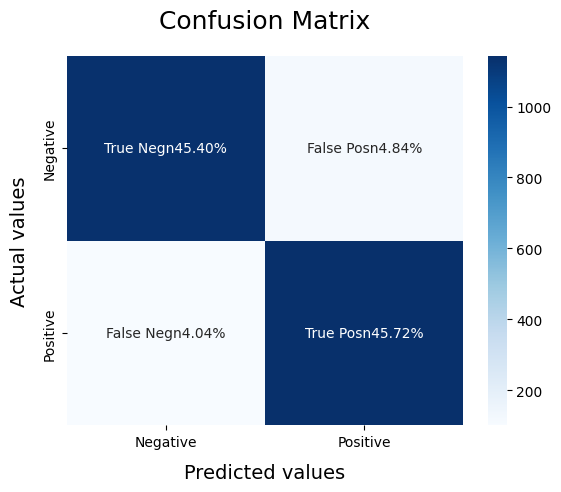

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

### ROC curve

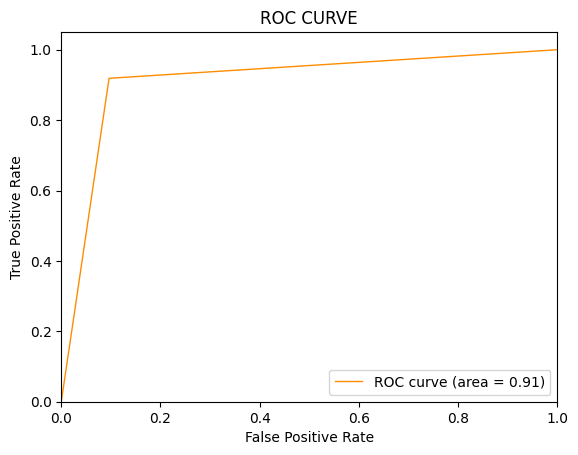

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression Model

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1256
           1       0.89      0.91      0.90      1244

    accuracy                           0.90      2500
   macro avg       0.90      0.90      0.90      2500
weighted avg       0.90      0.90      0.90      2500



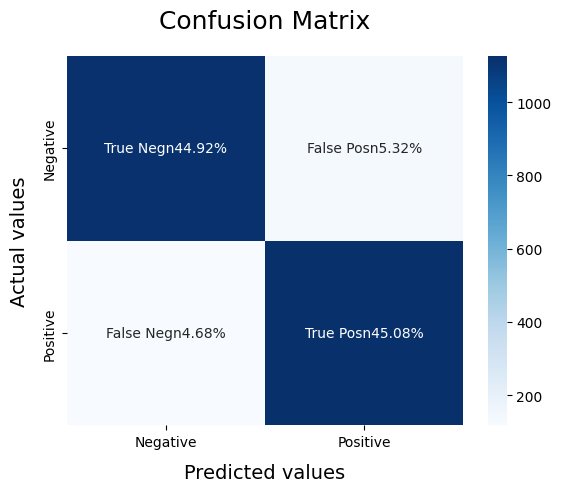

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

### ROC curve

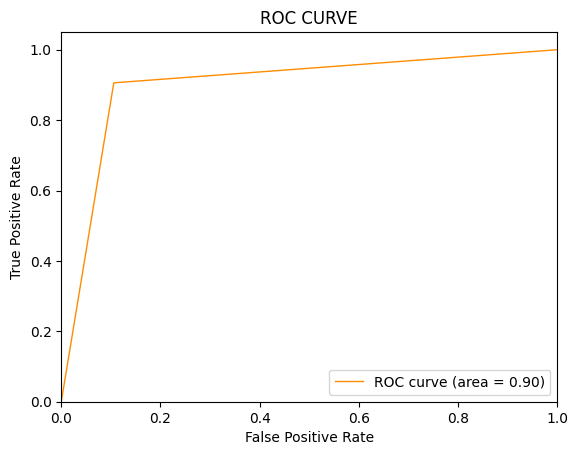

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()